<a href="https://colab.research.google.com/github/MuhammadRaynaldi/Python-Project/blob/main/Wind_Farm_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install windpowerlib

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import data as wt
from windpowerlib import TurbineClusterModelChain,WindTurbine,WindFarm,ModelChain

In [12]:
Weather_Data = pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],
                           date_parser=lambda idx:pd.to_datetime(idx,utc=True))
Weather_Data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


In [13]:
Selected_turbine = {'turbine_type': 'E48/800', 'hub_height': 60}
W_Turbine = WindTurbine(**Selected_turbine)

**We can use different Model from different manufacturer**

In [ ]:
# Selected_turbine = {'turbine_type': 'E48/800', 'hub_height': 60}
#just change the (Enercon) E48/800 with another model such as V90/2000 (vestas)
# W_Turbine = WindTurbine(**Selected_turbine)
# wind_turbine_fleet = pd.DataFrame({'wind_turbine':[W_Turbine, None]})

# in case want to compare with another model just create new coding like above


**Use 10 similar Model**

In [14]:
#wind_turbine_fleet = pd.DataFrame({'wind_turbine':[W_Turbine, None],
#(same method but for some models)     'number_of_turbines':{10,None]})
                                    #'total_capacity':[8000,None] if you don't have number of Wind Turbine

farm_data = {
              'wind_turbine_fleet':[W_Turbine.to_group(10)],
              'efficiency':0.9

}

farm_data_2 = WindFarm(**farm_data)

Wind_Farm_Submodel =  {
                    'wake_losses_model':'wind_farm_efficiency',#'dena_mean' (default)
                    'Smoothing':True,                            # default is False
                    'standart_deviation_method':'turbulance_intensity', # 2 models, Staffel_Pfenniger and turbulance_intensity
                    'wind_speed_model':'hellman', # we can use 3 model, 1. hellman, 2. logarithmic (default), 3. interpolation-extrapolation
                    'density_model':'ideal_gas',  #3 model, 1. Barometric (default), 2. ideal_gas, 3.interpolation-extrapolation
                    'temperature_model':'linear_gradient', #other model, interpolation-extrapolation
                    'power_output_model': 'power_curve', # 'power curve is the default'
                    'density_correction': True,   #False (default)
                    'obstacle_height': 0,         #default is 0
                    'hellman_exp':0.25
                       }

In [18]:
Model_Farm = TurbineClusterModelChain(farm_data_2,**Wind_Farm_Submodel).run_model(Weather_Data)
Farm_Power_Output =(Model_Farm.power_output)/1000
Farm_Power_Output

2019-01-01 00:00:00+00:00    5497.986914
2019-01-01 01:00:00+00:00    5737.052881
2019-01-01 02:00:00+00:00    4743.778341
2019-01-01 03:00:00+00:00    1533.553478
2019-01-01 04:00:00+00:00      18.108831
                                ...     
2019-12-31 19:00:00+00:00     276.251707
2019-12-31 20:00:00+00:00     529.321915
2019-12-31 21:00:00+00:00    1470.480186
2019-12-31 22:00:00+00:00    2663.955559
2019-12-31 23:00:00+00:00    2483.746946
Name: feedin_power_plant, Length: 8760, dtype: float64

**Visualization**

**Single Wind Turbine Model**

In [17]:
Turbine_Sub_Models = {
    'wind_speed_model':'hellman', # we can use 3 model, 1. hellman, 2. logarithmic (default), 3. interpolation-extrapolation
    'density_model':'ideal_gas',  #3 model, 1. Barometric (default), 2. ideal_gas, 3.interpolation-extrapolation
    'temperature_model':'linear_gradient', #other model, interpolation-extrapolation

    'power_output_model': 'power_coefficient_curve', # 'power curve is the default'
    'density_correction': True,   #False (default)
    'obstacle_height': 0,         #default is 0
    'hellman_exp':0.25
}

Model = ModelChain(W_Turbine,**Turbine_Sub_Models).run_model(Weather_Data) #don;t forget to put ModelChain in import section
Turbine_Power_Output = (Model.power_output)/1000 #for kW unit
Turbine_Power_Output

2019-01-01 00:00:00+00:00    607.007263
2019-01-01 01:00:00+00:00    632.135315
2019-01-01 02:00:00+00:00    518.769474
2019-01-01 03:00:00+00:00    167.707041
2019-01-01 04:00:00+00:00      1.009322
                                ...    
2019-12-31 19:00:00+00:00     28.706123
2019-12-31 20:00:00+00:00     57.379249
2019-12-31 21:00:00+00:00    160.043377
2019-12-31 22:00:00+00:00    289.477526
2019-12-31 23:00:00+00:00    271.784218
Name: feedin_power_plant, Length: 8760, dtype: float64

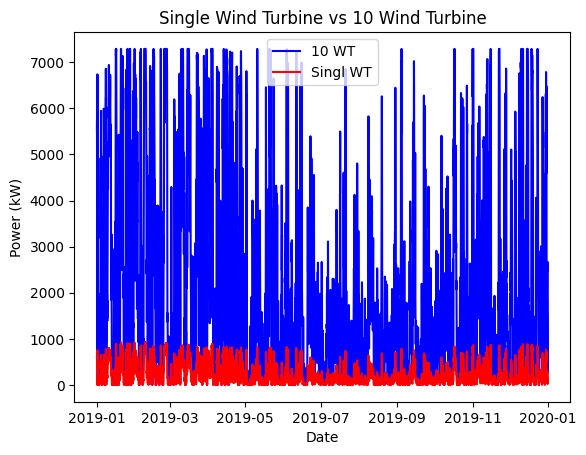

In [29]:
plt.plot(Farm_Power_Output, c = 'b', label = '10 WT')
plt.plot(Turbine_Power_Output, c= 'r', label = 'Singl WT')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.title('Single Wind Turbine vs 10 Wind Turbine')
plt.legend()
plt.show()